In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
# by using this we can get full display of rows and columns
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows',None)

In [4]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [5]:
df.head(4)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [7]:
# In previous cell we can see that We have data
# types: float64(3), object(10)
# Rows: 5268 entries, 0 to 5267
# Data Columns: total 13 columns

# Print statement indicating we are listing object columns
print('Object columns in the DataFrame:')
# Loop through each object column and print its name with a numbered list
for idx, column_name in enumerate(df.select_dtypes(include=['object']).columns, 1):
    print(f'\t{idx}) {column_name}')
# Print statement indicating we are listing floating-point columns
print('Floating-point columns in the DataFrame:')
# Loop through each floating-point column and print its name with a numbered list
for idx, column_name in enumerate(df.select_dtypes(include=['float']).columns, 1):
    print(f'\t{idx}) {column_name}')


Object columns in the DataFrame:
	1) Date
	2) Time
	3) Location
	4) Operator
	5) Flight #
	6) Route
	7) Type
	8) Registration
	9) cn/In
	10) Summary
Floating-point columns in the DataFrame:
	1) Aboard
	2) Fatalities
	3) Ground


In [8]:
df.describe().T.style.bar(
    subset=['mean'],
    color= '#ABE32A').background_gradient(subset='std',cmap='PuBu').background_gradient(subset='50%',cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.000000,27.554518,43.076711,0.000000,5.000000,13.000000,30.000000,644.000000
Fatalities,5256.000000,20.068303,33.199952,0.000000,3.000000,9.000000,23.000000,583.000000
Ground,5246.000000,1.608845,53.987827,0.000000,0.000000,0.000000,0.000000,2750.000000


In [9]:
# Convert 'Date' Column to Datetime

In [10]:
# Extracting Month column
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [11]:
# Extracting Year column
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [12]:
# checking null values
missing = df.isnull().sum().sort_values(ascending=False)

# Filter columns with more than zero missing values
missing = missing[missing > 0]

# Display columns with missing values
print("Columns with missing values:")
print(missing)


Columns with missing values:
Flight #        4199
Time            2219
Route           1707
cn/In           1228
Summary          390
Registration     335
Type              27
Aboard            22
Ground            22
Location          20
Operator          18
Fatalities        12
dtype: int64


In [13]:
# handling null values
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
# as there are large number of null values which is almost 79% of column so we will drop this column
# df.drop('Flight #',axis=1,inplace=True)
# we replace the missing values with Unknown   
df['Time'].fillna('Unknown',inplace=True)
df['Time'].isnull().any()
# We replace the missing values with the most repeated values
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
# We replace the missing values with the most repeated values same as we do in Location column
df['Operator'].fillna(df['Operator'].mode()[0],inplace = True)
# imputing column with Unknown
df['Route'].fillna('Unknown',inplace=True)
# imputing column with Unknown
df['cn/In'].fillna('Unknown', inplace=True)
# imputing Registration
df['Registration'].fillna(df['Registration'].mode()[0],inplace=True)
# Handling Type Column
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
# imputing by mean
df['Aboard'].fillna(df['Aboard'].mean(),inplace=True)
# imputing by mean
df['Fatalities'].fillna(df['Fatalities'].mean(),inplace=True)
# imputing by mean
df['Ground'].fillna(df['Ground'].mean(),inplace=True)
# imputing by Unknown
df['Summary'].fillna('Unknown',inplace=True)
# Reset warnings to default behavior
warnings.resetwarnings()

In [14]:
# Generating summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
              Date     Time        Location  Operator Flight #    Route  \
count         5268     5268            5268      5268     1069     5268   
unique        4753     1006            4303      2476      724     3244   
top     09/11/2001  Unknown  Moscow, Russia  Aeroflot        -  Unknown   
freq             4     2219              35       197       67     1707   
mean           NaN      NaN             NaN       NaN      NaN      NaN   
std            NaN      NaN             NaN       NaN      NaN      NaN   
min            NaN      NaN             NaN       NaN      NaN      NaN   
25%            NaN      NaN             NaN       NaN      NaN      NaN   
50%            NaN      NaN             NaN       NaN      NaN      NaN   
75%            NaN      NaN             NaN       NaN      NaN      NaN   
max            NaN      NaN             NaN       NaN      NaN      NaN   

                Type Registration    cn/In       Aboard   Fatalities  \
count 

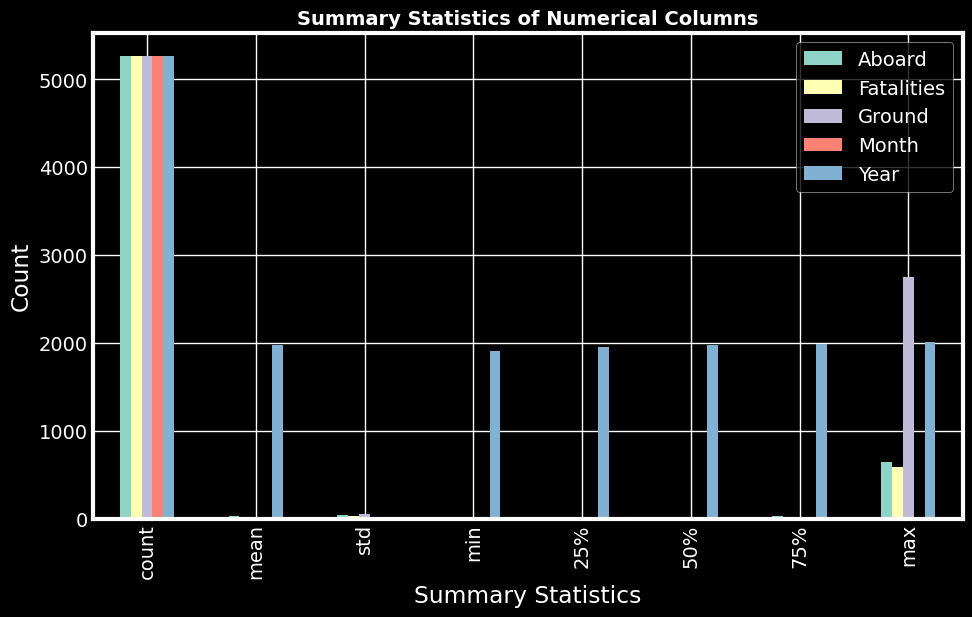

In [15]:
# Visualize the distribution of key numerical features
descibe_numerical = df.describe()

# Visualize the data of numerical features
descibe_numerical.plot(kind='bar', figsize=(10, 6))

# Set titles and labels
plt.xlabel('Summary Statistics')
plt.ylabel('Count')
plt.title('Summary Statistics of Numerical Columns', fontweight='bold', fontsize=14)

# Display the plot
plt.show()


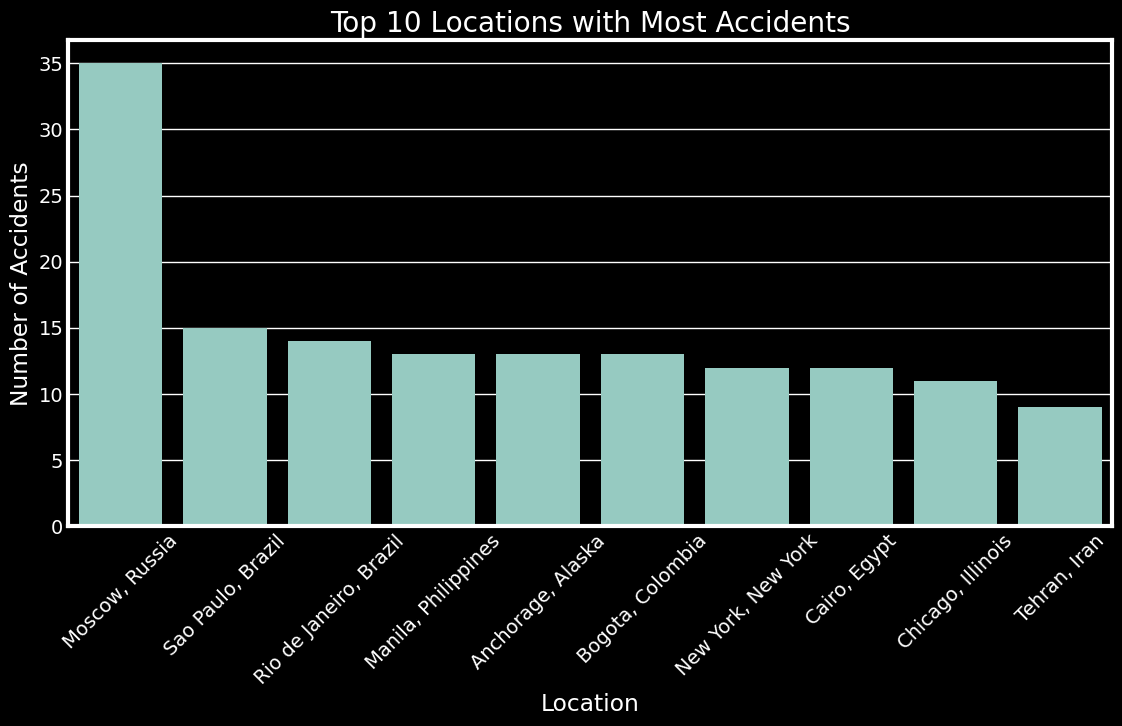

In [16]:
plt.figure(figsize=(12, 6))
top_locations = df['Location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations with Most Accidents')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

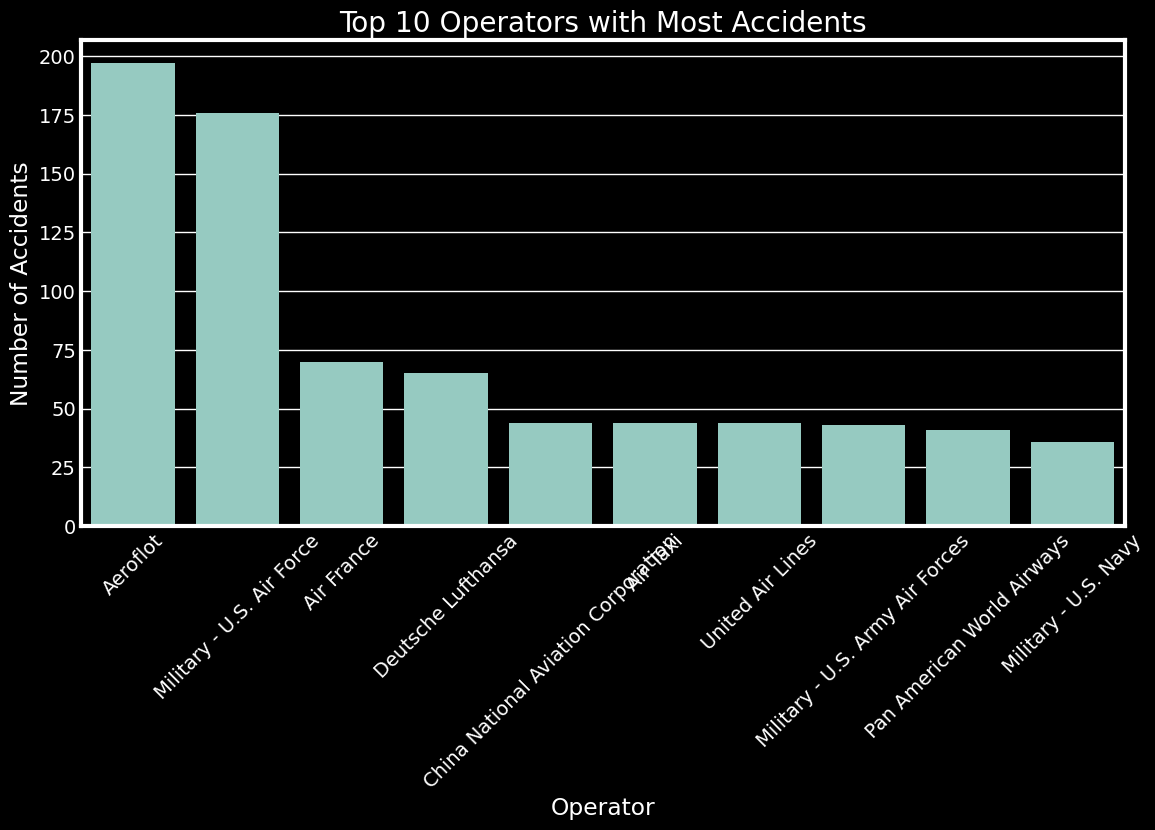

In [17]:
plt.figure(figsize=(12, 6))
top_operators = df['Operator'].value_counts().head(10)
sns.barplot(x=top_operators.index, y=top_operators.values)
plt.title('Top 10 Operators with Most Accidents')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

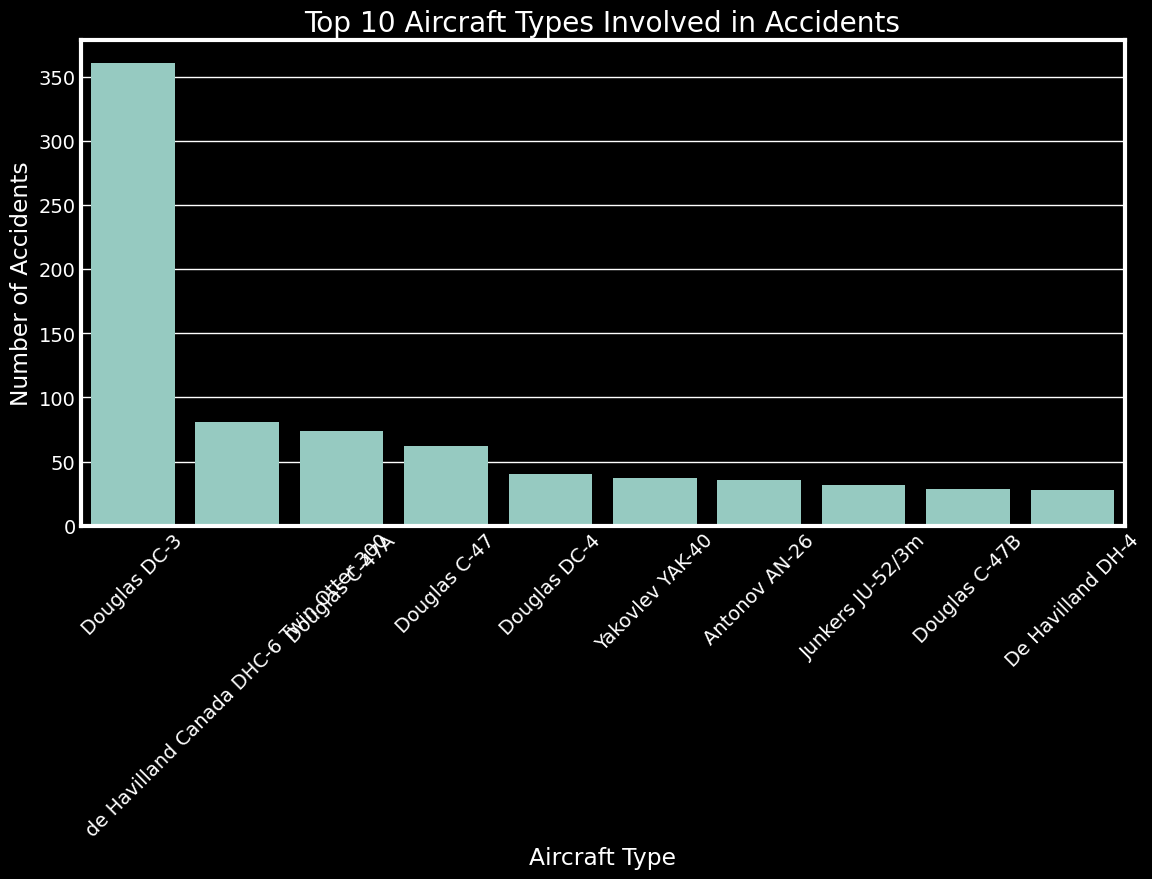

In [18]:
# Problem 3: Analyze the distribution of aircraft types involved in accidents
plt.figure(figsize=(12, 6))
top_aircraft_types = df['Type'].value_counts().head(10)
sns.barplot(x=top_aircraft_types.index, y=top_aircraft_types.values)
plt.title('Top 10 Aircraft Types Involved in Accidents')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

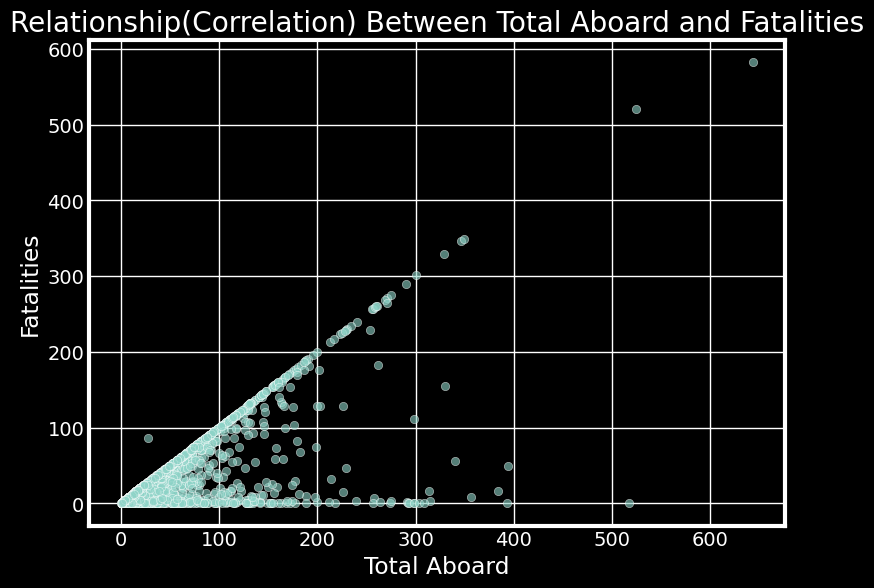

In [19]:
# Problem 4: Visualize the relationship between Total Aboard and Fatalities
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Aboard', y='Fatalities', data=df, alpha=0.6)
plt.title('Relationship(Correlation) Between Total Aboard and Fatalities')
plt.xlabel('Total Aboard')
plt.ylabel('Fatalities')
plt.grid(True)
plt.show()

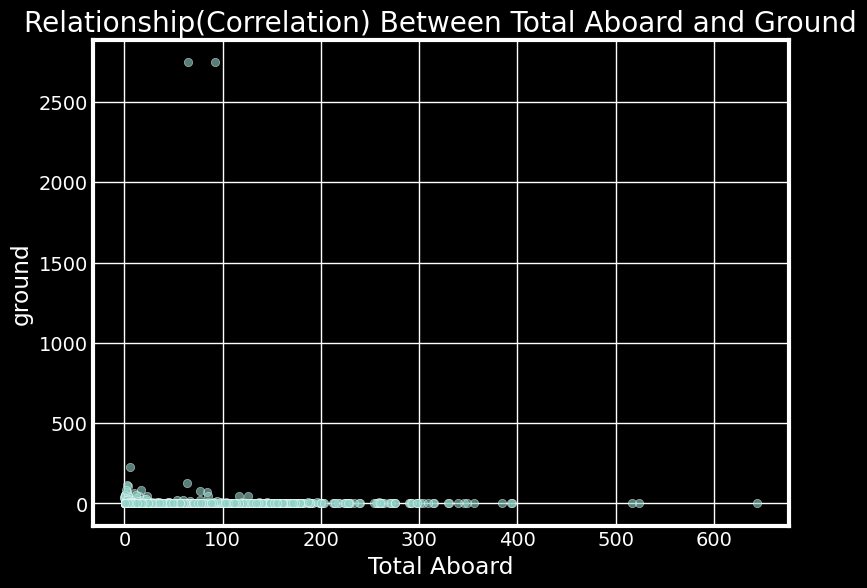

In [20]:
# Problem 4: Visualize the relationship between Total ground
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Aboard', y='Ground', data=df, alpha=0.6)
plt.title('Relationship(Correlation) Between Total Aboard and Ground')
plt.xlabel('Total Aboard')
plt.ylabel('ground')
plt.grid(True)
plt.show()

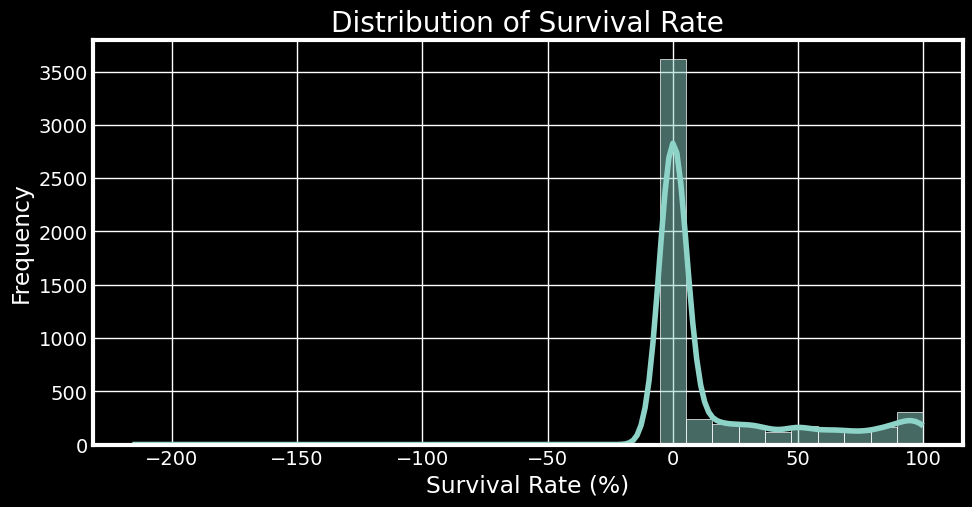

In [21]:
# Visualizing the survival rate
df['Survival Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard'] * 100

plt.figure(figsize=(10, 5))
sns.histplot(df['Survival Rate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Survival Rate')
plt.xlabel('Survival Rate (%)')
plt.ylabel('Frequency')
plt.show()

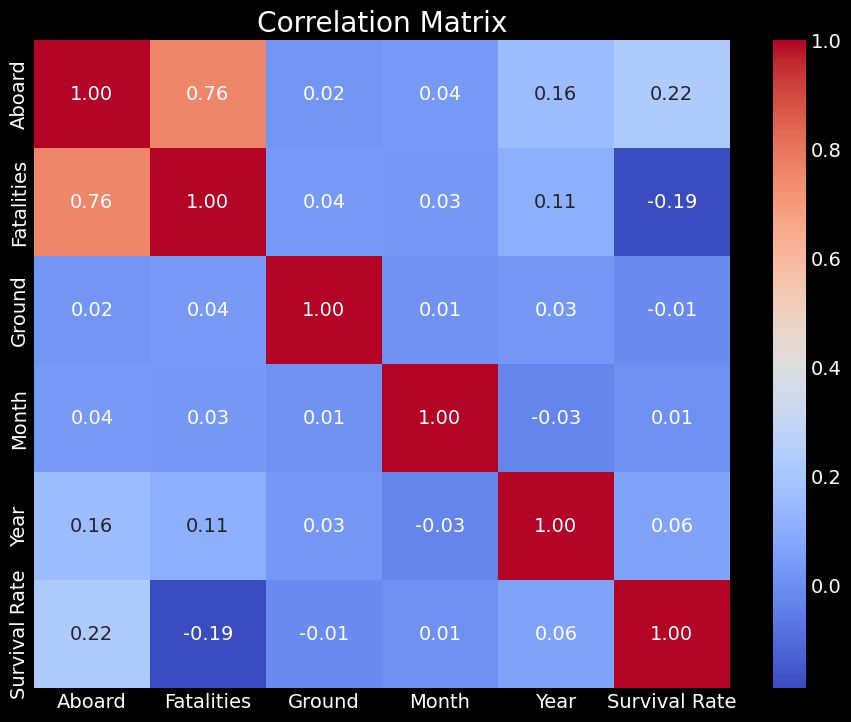

In [22]:
# Display correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

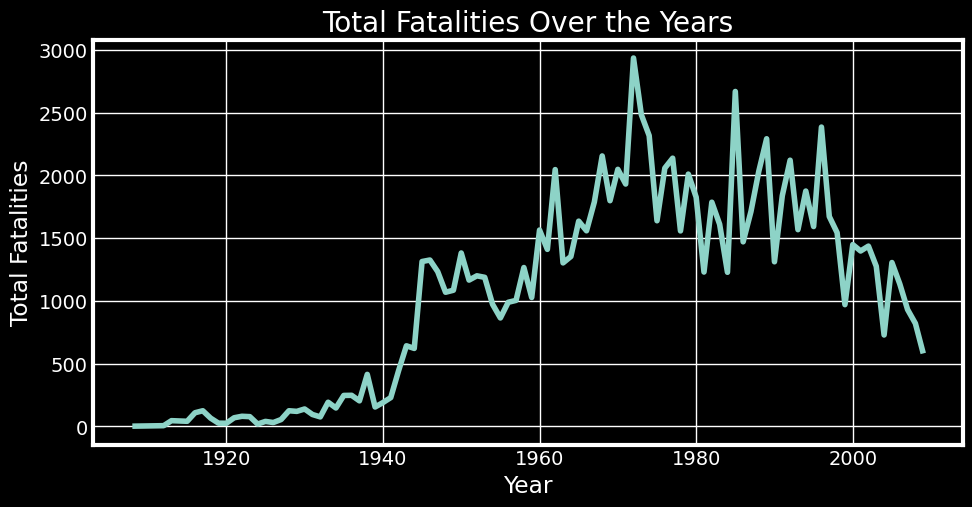

In [23]:
# Problem 1(b): Visualize the trend of fatalities over time
fatalities_per_year = df.groupby('Year')['Fatalities'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Fatalities', data=fatalities_per_year)
plt.title('Total Fatalities Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.show()